# <span style="color:red"> Numerical Simulation 11 </span>

## Exercise 11.1

#### <span style="color:black"> Objective </span>

In this exercise we aim at gaining experience in the use of tensorflow library, in particular using a simple linear fit model we wanto to see how the accuracy change with the cange in parameter such as the number of training point or the epoch's number.
The straight line to fit was $$y=2x+1$$

#### <span style="color:black"> Test process </span>

Starting from the code in the lesson jupyter at first I increased the number of training point and validation point from $100$ and $10$ respectively to $1500$ and $150$. The model increases his accuracy but not enough, after that I enlarge the epoch's number from $30$ to $100$ and this made the model almost perfect. All this test was made with $\sigma=0$ off course changing sigma makes the fit worse.

#### <span style="color:black"> Showed model </span>

The model showed below is the one with $\sigma=0$. There is no doubt about his consistency with the straight line.

In [6]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1500)
x_valid = np.random.uniform(-1, 1, 150)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
47/47 [==============================] - 0s 3ms/step - loss: 0.7495 - mse: 0.7495 - val_loss: 0.4146 - val_mse: 0.4146
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 0.2189 - mse: 0.2189 - val_loss: 0.1463 - val_mse: 0.1463
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0881 - mse: 0.0881 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0420 - mse: 0.0420 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 7/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0029 - m

47/47 [==============================] - 0s 1ms/step - loss: 1.2300e-11 - mse: 1.2300e-11 - val_loss: 1.2713e-11 - val_mse: 1.2713e-11
Epoch 58/100
47/47 [==============================] - 0s 1ms/step - loss: 1.2277e-11 - mse: 1.2277e-11 - val_loss: 1.2191e-11 - val_mse: 1.2191e-11
Epoch 59/100
47/47 [==============================] - 0s 1ms/step - loss: 1.1811e-11 - mse: 1.1811e-11 - val_loss: 1.2191e-11 - val_mse: 1.2191e-11
Epoch 60/100
47/47 [==============================] - 0s 1ms/step - loss: 1.1811e-11 - mse: 1.1811e-11 - val_loss: 1.2191e-11 - val_mse: 1.2191e-11
Epoch 61/100
47/47 [==============================] - 0s 1ms/step - loss: 1.1816e-11 - mse: 1.1816e-11 - val_loss: 1.2191e-11 - val_mse: 1.2191e-11
Epoch 62/100
47/47 [==============================] - 0s 1ms/step - loss: 1.1811e-11 - mse: 1.1811e-11 - val_loss: 1.2191e-11 - val_mse: 1.2191e-11
Epoch 63/100
47/47 [==============================] - 0s 1ms/step - loss: 1.1811e-11 - mse: 1.1811e-11 - val_loss: 1.2191e-11

In [9]:
# return weights
model.get_weights()

[array([[1.9999944]], dtype=float32), array([1.], dtype=float32)]

In [10]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5/5 [==============================] - 0s 649us/step - loss: 1.1252e-11 - mse: 1.1252e-11

Test loss: 1.1251674938983491e-11
Test accuracy: 1.1251674938983491e-11


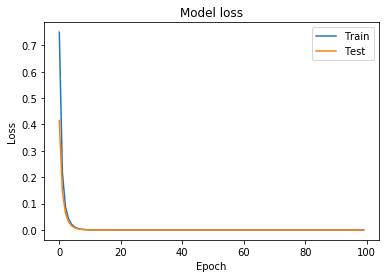

In [11]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

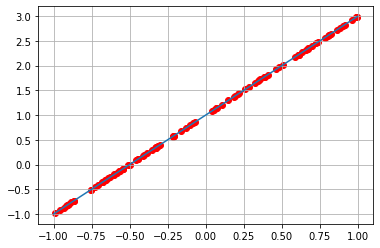

In [12]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

## Exercise 11.2

#### <span style="color:black"> Objective </span>

In this exercise we need to make use of the experience of previouse exercise to make a fit of the following third degree polynomial: $$ y=4-3x-2x^2+4x^3$$
Moreover we need to raise up the intricacy of the neural net adding layer and neuron and changing activation function.

#### <span style="color:black"> Improving routine </span>

I build the following routine for improving the accuracy of the model:
- starting from $N=1000$ training points and $L=100$ validation points add one layer with a neuron number less or equal than the previous one or, instead, add only some neuron to a previous existent layer.
- increasing the number of point preserving the ratio $\frac{L}{N}=0.1$. In average the increase was of 150 point for $N$
- changing the optimizer
- changing the loss function
- changing the activation function of the layers
off course after every one of the ruotine's step I checked if accuracy of the model is improving or not. As optimizer I tried SGD,Adamax and Adagrad while as loss function I tried MSE,mean absolute error (MAE) and mean squared logarithmic error (MSLE). 

#### <span style="color:black"> Test process and model discussion </span>

I started with two layers, one with $5$ neurons and one with $1$ neuron. It was not enough. I noticed an improving from a 4 layers: the first with 30 neurons, the second one with 20, the third with 10 and the last with 1. However with this parameter and the points set as $N=2500$ and $L=250$ there's no way to fit the polynomial around $0.8$ where it changes the first derivative sign. In fact the fit continued going down instead increasing. It was needed to add another 2 layers for observing the right change in first derivative sign of the model.

Between the tested optimizer adamax and adagrad performed almost the same while SGD was little bit worse, this is a reasonable result because adamax and adagrad are more evoluted optimizer. The models obtained with MSE and MSLE were similar while MAE was the less accurate loss function. Although increasing sigma reduce the accuracy of the model's prediction doesn't goes through any overfitting problem. Every simulations until this point were made with $\sigma=0$ but even increasing sigma the models didn't go through overfitting. Furthermore the behaviour of optimizers and loss functions remained the same as with $\sigma=0$. 

The showed models are only the one with $\sigma=0$ in fact if the other would be included the jupyter became too long.

The last picture shows that outside the fitted data the model is not able to make any useful prediction.

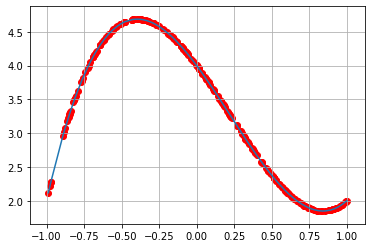

In [21]:
# target parameters of f(x) = m*x + b
a = 3
b = -2
c = -3 
d = 4 

import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2500)
x_valid = np.random.uniform(-1, 1, 250)
x_valid.sort()
y_target = d + c*x_valid + b*x_valid*x_valid + a*x_valid*x_valid*x_valid # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(d + c*x_train + b*x_train*x_train + a*x_train*x_train*x_train, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(d + c*x_valid + b*x_valid*x_valid + a*x_valid*x_valid*x_valid, sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [25]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(30, input_shape=(1,)))
model.add(Dense(20,activation='softplus'))
model.add(Dense(10,activation='selu'))
model.add(Dense(10, activation='softplus'))
model.add(Dense(5,activation='elu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Adamax', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 30)                60        
_________________________________________________________________
dense_20 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 6         
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
____________________________________________________

In [26]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))



Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 2.8826 - mse: 2.8826 - val_loss: 0.5837 - val_mse: 0.5837
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.6056 - mse: 0.6056 - val_loss: 0.4513 - val_mse: 0.4513
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 0.5503 - mse: 0.5503 - val_loss: 0.4160 - val_mse: 0.4160
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4934 - mse: 0.4934 - val_loss: 0.3512 - val_mse: 0.3512
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 0.4227 - mse: 0.4227 - val_loss: 0.2861 - val_mse: 0.2861
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.3543 - mse: 0.3543 - val_loss: 0.2323 - val_mse: 0.2323
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2882 - mse: 0.2882 - val_loss: 0.1937 - val_mse: 0.1937
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2309 - m

Epoch 61/100
79/79 [==============================] - 0s 1ms/step - loss: 3.2822e-04 - mse: 3.2822e-04 - val_loss: 3.1009e-04 - val_mse: 3.1009e-04
Epoch 62/100
79/79 [==============================] - 0s 1ms/step - loss: 2.7418e-04 - mse: 2.7418e-04 - val_loss: 3.3385e-04 - val_mse: 3.3385e-04
Epoch 63/100
79/79 [==============================] - 0s 1ms/step - loss: 2.7524e-04 - mse: 2.7524e-04 - val_loss: 2.9474e-04 - val_mse: 2.9474e-04
Epoch 64/100
79/79 [==============================] - 0s 1ms/step - loss: 2.9089e-04 - mse: 2.9089e-04 - val_loss: 3.1101e-04 - val_mse: 3.1101e-04
Epoch 65/100
79/79 [==============================] - 0s 1ms/step - loss: 2.8682e-04 - mse: 2.8682e-04 - val_loss: 5.1365e-04 - val_mse: 5.1365e-04
Epoch 66/100
79/79 [==============================] - 0s 1ms/step - loss: 3.0241e-04 - mse: 3.0241e-04 - val_loss: 3.7917e-04 - val_mse: 3.7917e-04
Epoch 67/100
79/79 [==============================] - 0s 1ms/step - loss: 3.0795e-04 - mse: 3.0795e-04 - val_los

8/8 [==============================] - 0s 709us/step - loss: 1.7054e-04 - mse: 1.7054e-04

Test loss: 0.00017053846386261284
Test accuracy: 0.00017053846386261284


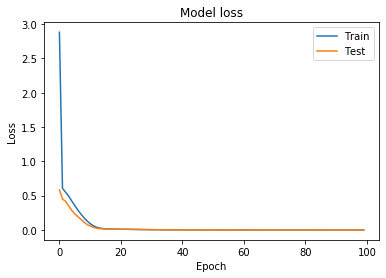

In [27]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


In [28]:
model1 = tf.keras.Sequential()
model1.add(Dense(5, input_shape=(1,)))
model1.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='Adamax', loss='mse', metrics=["mae"])
#fit the model using training dataset
history = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# evaluate model
score = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/100
79/79 [==============================] - 0s 1ms/step - loss: 11.8491 - mae: 3.2207 - val_loss: 11.0566 - val_mae: 3.1116
Epoch 2/100
79/79 [==============================] - 0s 993us/step - loss: 10.4784 - mae: 3.0202 - val_loss: 9.7119 - val_mae: 2.9031
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 9.0316 - mae: 2.7855 - val_loss: 8.2247 - val_mae: 2.6522
Epoch 4/100
79/79 [==============================] - 0s 995us/step - loss: 7.4830 - mae: 2.5103 - val_loss: 6.6517 - val_mae: 2.3585
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 5.9915 - mae: 2.2160 - val_loss: 5.2904 - val_mae: 2.0744
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 4.6207 - mae: 1.9045 - val_loss: 3.9449 - val_mae: 1.7475
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 3.3283 - mae: 1.5560 - val_loss: 2.7346 - val_mae: 1.3959
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 2.2

79/79 [==============================] - 0s 1ms/step - loss: 0.5761 - mae: 0.6161 - val_loss: 0.4477 - val_mae: 0.5574
Epoch 64/100
79/79 [==============================] - 0s 1ms/step - loss: 0.5761 - mae: 0.6172 - val_loss: 0.4479 - val_mae: 0.5578
Epoch 65/100
79/79 [==============================] - 0s 1ms/step - loss: 0.5763 - mae: 0.6177 - val_loss: 0.4489 - val_mae: 0.5585
Epoch 66/100
79/79 [==============================] - 0s 1ms/step - loss: 0.5761 - mae: 0.6177 - val_loss: 0.4470 - val_mae: 0.5575
Epoch 67/100
79/79 [==============================] - 0s 994us/step - loss: 0.5763 - mae: 0.6167 - val_loss: 0.4473 - val_mae: 0.5573
Epoch 68/100
79/79 [==============================] - 0s 975us/step - loss: 0.5762 - mae: 0.6166 - val_loss: 0.4464 - val_mae: 0.5563
Epoch 69/100
79/79 [==============================] - 0s 995us/step - loss: 0.5762 - mae: 0.6167 - val_loss: 0.4462 - val_mae: 0.5564
Epoch 70/100
79/79 [==============================] - 0s 1ms/step - loss: 0.5761 - 

In [29]:
model2 = tf.keras.Sequential()
model2.add(Dense(30, input_shape=(1,), activation="selu"))
model2.add(Dense(20, activation="selu"))
model2.add(Dense(10, activation="elu"))
model2.add(Dense(1, activation="elu"))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='SGD', loss='mse', metrics=["mae"])
#fit the model using training dataset
history = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# evaluate model
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 0.8345 - mae: 0.6262 - val_loss: 0.2441 - val_mae: 0.3780
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 0.2819 - mae: 0.3907 - val_loss: 0.1471 - val_mae: 0.2839
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 0.1762 - mae: 0.2945 - val_loss: 0.0863 - val_mae: 0.2052
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0979 - mae: 0.2113 - val_loss: 0.0460 - val_mae: 0.1359
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0572 - mae: 0.1596 - val_loss: 0.0382 - val_mae: 0.1393
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0374 - mae: 0.1320 - val_loss: 0.0271 - val_mae: 0.1255
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0276 - mae: 0.1189 - val_loss: 0.0247 - val_mae: 0.1226
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0186 - m

79/79 [==============================] - 0s 1ms/step - loss: 0.0028 - mae: 0.0349 - val_loss: 0.0055 - val_mae: 0.0544
Epoch 64/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0028 - mae: 0.0352 - val_loss: 0.0033 - val_mae: 0.0370
Epoch 65/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0025 - mae: 0.0318 - val_loss: 0.0028 - val_mae: 0.0374
Epoch 66/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0025 - mae: 0.0321 - val_loss: 0.0022 - val_mae: 0.0274
Epoch 67/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0025 - mae: 0.0320 - val_loss: 0.0055 - val_mae: 0.0603
Epoch 68/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0028 - mae: 0.0352 - val_loss: 0.0086 - val_mae: 0.0789
Epoch 69/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0024 - mae: 0.0320 - val_loss: 0.0023 - val_mae: 0.0288
Epoch 70/100
79/79 [==============================] - 0s 1ms/step - loss: 0.0024 - mae: 0

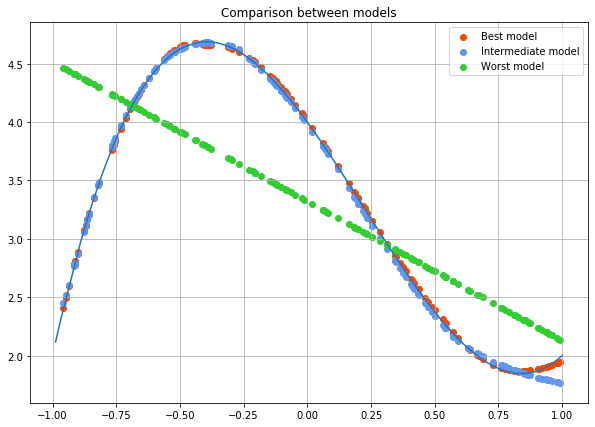

In [33]:
x_predicted = np.random.uniform(-1, 1, 150)
y_predicted = model.predict(x_predicted)
y1_predicted=model1.predict(x_predicted)
y2_predicted=model2.predict(x_predicted)
plt.figure(figsize=(10,7))
plt.title("Comparison between models")
plt.scatter(x_predicted, y_predicted, color='orangered', label="Best model")
plt.scatter(x_predicted, y2_predicted, color='cornflowerblue', label="Intermediate model")
plt.scatter(x_predicted, y1_predicted, color='limegreen', label="Worst model")
plt.plot(x_valid, y_target)
plt.grid(True)
plt.legend()
plt.show()

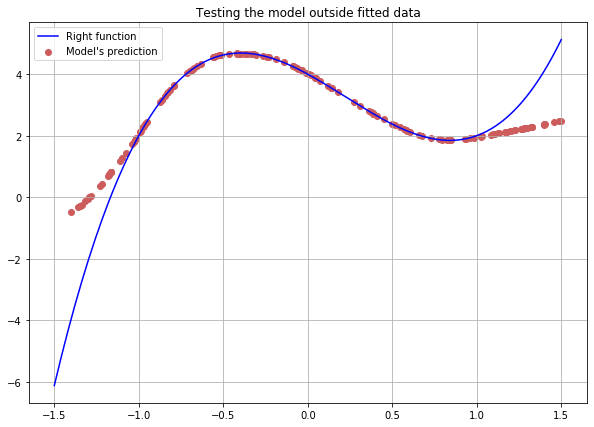

In [48]:
# target parameters of f(x) = m*x + b
a = 3
b = -2
c = -3 
d = 4 

def f(x):
    return d + c*x + b*x*x + a*x*x*x;

x=np.linspace(-1.5, 1.5 , num=150)
y=[]
for i in range(150):
    y.append(f(x[i]))

    
x_predicted = np.random.uniform(-1.5, 1.5, 150)
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(10,7))
plt.title("Testing the model outside fitted data")
plt.scatter(x_predicted, y_predicted,color='indianred',label="Model's prediction")
#plt.plot(x_valid, y_target)
plt.plot(x,y, color='blue',label="Right function")
plt.grid(True)
plt.legend()
plt.show()

## Exercise 11.3

#### <span style="color:black"> Objective </span>

The task was to upgrading the model for fitting a simple trigonometric 2D function $$f(x,y) = \sin(x^2+y^2)$$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

#### <span style="color:black"> Model discussion and result </span>

I followed the previous scheme for improving the model. It was required 6 layer with a total of 1971 parameter for reaching a good consistency with the known behaviour of the function. Again $\sigma$ was set equal to 0, the points necessary was $5000$ of training and $500$ of test. Adamax was the choiche for optimizer and MSE was the choiche for the loss.   

I find that models has fitted well the function as it is visible in the last picture.

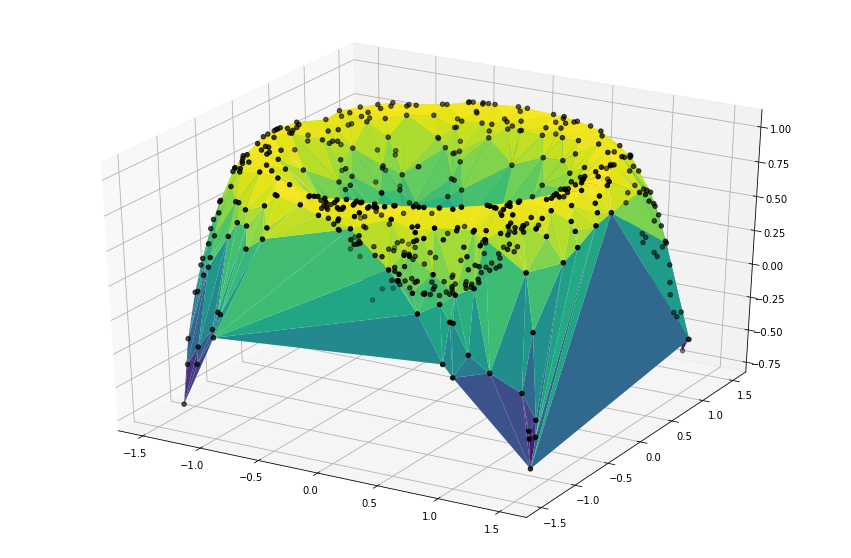

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
%matplotlib inline
#f(x,y) = sin(x^2+y^2)
def f(x, y):
    return np.sin(x ** 2 + y ** 2)

# generate training inputs
np.random.seed(0)
n_tr = 5000
n_val = 500
x_tr = np.zeros((n_tr, 2))
y_tr = np.zeros(n_tr)
x_val = np.zeros((n_val, 2))
y_val = np.zeros(n_val)
x=np.zeros(n_val)
y=np.zeros(n_val)
#y_target=np.zeros(n_val)
sigma = 0.0 # noise standard deviation

for i in range(n_tr):
  x_tr[i,0]=np.random.uniform(-1.5, 1.5)
  x_tr[i,1]=np.random.uniform(-1.5, 1.5)
  y_tr[i]=np.random.normal(np.sin(pow(x_tr[i,0],2)+pow(x_tr[i,1],2)), sigma)

for i in range(n_val):
  x_val[i,0]=np.random.uniform(-1.5, 1.5)
  x_val[i,1]=np.random.uniform(-1.5, 1.5)
  x[i]=x_val[i,0]
  y[i]=x_val[i,1]
  y_val[i]=np.random.normal(np.sin(pow(x[i],2)+pow(y[i],2)), sigma)
 # y_target[i]=np.sin(pow(x_tr[i,0],2)+pow(x_tr[i,1],2))
y_target=f(x,y)
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")  

ax.plot_trisurf(x, y, y_target,cmap="viridis",edgecolor="none")
ax.scatter3D(x,y, y_val, color='black')
plt.grid(True); plt.show()

In [50]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras import optimizers, losses, metrics

model = tf.keras.Sequential()
model.add(Dense(30, input_shape=(2,), activation="selu"))
model.add(Dense(30,activation='softplus'))
model.add(Dense(20,activation='selu'))
model.add(Dense(10,activation='selu'))
model.add(Dense(10, activation='softplus'))
model.add(Dense(1, activation="elu"))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Adamax', loss='mse', metrics=["mae"])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 30)                90        
_________________________________________________________________
dense_32 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_33 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 1,971
Trainable params: 1,971
Non-trainable params: 0
____________________________________________________

Using TensorFlow backend.


In [51]:
#fit the model using training dataset
history = model.fit(x=x_tr, y=y_tr, 
          batch_size=32, epochs=120,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_val, y_val))

# evaluate model
score = model.evaluate(x_val, y_val, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_val, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/120
157/157 [==============================] - 0s 1ms/step - loss: 0.1478 - mae: 0.3043 - val_loss: 0.1421 - val_mae: 0.3017
Epoch 2/120
157/157 [==============================] - 0s 991us/step - loss: 0.1403 - mae: 0.2972 - val_loss: 0.1395 - val_mae: 0.2927
Epoch 3/120
157/157 [==============================] - 0s 1ms/step - loss: 0.1355 - mae: 0.2912 - val_loss: 0.1299 - val_mae: 0.2918
Epoch 4/120
157/157 [==============================] - 0s 988us/step - loss: 0.1300 - mae: 0.2855 - val_loss: 0.1245 - val_mae: 0.2890
Epoch 5/120
157/157 [==============================] - 0s 973us/step - loss: 0.1258 - mae: 0.2808 - val_loss: 0.1199 - val_mae: 0.2768
Epoch 6/120
157/157 [==============================] - 0s 988us/step - loss: 0.1199 - mae: 0.2719 - val_loss: 0.1121 - val_mae: 0.2725
Epoch 7/120
157/157 [==============================] - 0s 1ms/step - loss: 0.1148 - mae: 0.2645 - val_loss: 0.1065 - val_mae: 0.2692
Epoch 8/120
157/157 [==============================] - 0s 1ms

Epoch 62/120
157/157 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0772 - val_loss: 0.0159 - val_mae: 0.1031
Epoch 63/120
157/157 [==============================] - 0s 1ms/step - loss: 0.0109 - mae: 0.0796 - val_loss: 0.0112 - val_mae: 0.0802
Epoch 64/120
157/157 [==============================] - 0s 981us/step - loss: 0.0102 - mae: 0.0771 - val_loss: 0.0086 - val_mae: 0.0716
Epoch 65/120
157/157 [==============================] - 0s 996us/step - loss: 0.0099 - mae: 0.0766 - val_loss: 0.0137 - val_mae: 0.0929
Epoch 66/120
157/157 [==============================] - 0s 978us/step - loss: 0.0105 - mae: 0.0782 - val_loss: 0.0086 - val_mae: 0.0715
Epoch 67/120
157/157 [==============================] - 0s 983us/step - loss: 0.0098 - mae: 0.0766 - val_loss: 0.0082 - val_mae: 0.0696
Epoch 68/120
157/157 [==============================] - 0s 1ms/step - loss: 0.0091 - mae: 0.0727 - val_loss: 0.0090 - val_mae: 0.0732
Epoch 69/120
157/157 [==============================] 

16/16 [==============================] - 0s 732us/step - loss: 0.0016 - mae: 0.0315

Test loss: 0.0016237077070400119
Test accuracy: 0.031503815203905106


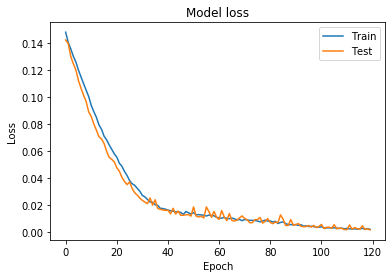

In [52]:
# look into training history
# Plot training & validation loss values

model.get_weights()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

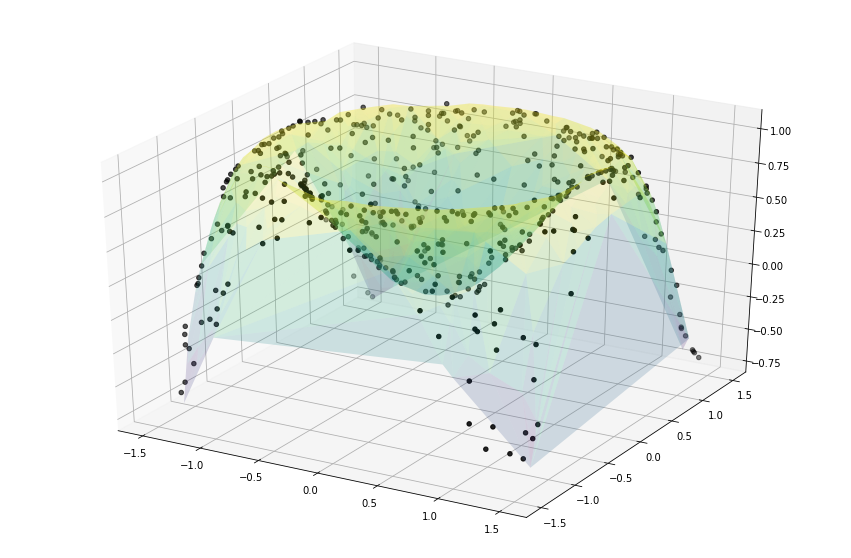

In [57]:
n=500
x0=np.zeros(n)
y0=np.zeros(n)
x_predicted = np.zeros((n, 2))
for i in range(n):
  x_predicted[i,0]=np.random.uniform(-1.5, 1.5)
  x_predicted[i,1]=np.random.uniform(-1.5, 1.5)
  x0[i]=x_predicted[i,0]
  y0[i]=x_predicted[i,1]
y_predicted = model.predict(x_predicted) 

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d") 
ax.plot_trisurf(x, y, y_target,cmap="viridis",edgecolor="none", alpha=0.2)
#ax.plot_trisurf(x0, y0, y_predicted, cmap="viridis",edgecolor="none")
ax.scatter3D(x0,y0, y_predicted, color='black')
plt.grid(True)
plt.show()